In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [18]:
data = pd.read_csv(r"C:\Users\USER\Desktop\Uni lvl 200\Project Repository\Diabetes predictor app\data\diabetes_tweaked.csv")

In [19]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,29.0,125.0,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,72.0,29.0,125.0,35.3,0.134,29,0
8,8,125.0,96.0,29.0,125.0,32.3,0.232,54,1
9,4,110.0,92.0,29.0,125.0,37.6,0.191,30,0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               731 non-null    int64  
 1   Glucose                   731 non-null    float64
 2   BloodPressure             731 non-null    float64
 3   SkinThickness             731 non-null    float64
 4   Insulin                   731 non-null    float64
 5   BMI                       731 non-null    float64
 6   DiabetesPedigreeFunction  731 non-null    float64
 7   Age                       731 non-null    int64  
 8   Outcome                   731 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 51.5 KB


In [21]:
data.isnull( ).sum()* 100 / data.shape[0]

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [22]:
# Check zero values in relevant columns
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
print(data[zero_cols].isin([0]).sum())

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


In [23]:
# Replace zeros with NaN
data[zero_cols] = data[zero_cols].replace(0, np.nan)

# Impute missing values with the median of each column
data.fillna(data.median(), inplace=True)

In [24]:
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [25]:
"""import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
data.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# Diabetes outcome distribution
sns.countplot(x='Outcome', data=data)
plt.title("Diabetes Outcome Distribution")
plt.show()
"""

'import matplotlib.pyplot as plt\nimport seaborn as sns\n\n# Histograms\ndata.hist(bins=20, figsize=(15, 10), edgecolor=\'black\')\nplt.suptitle("Feature Distributions", fontsize=16)\nplt.tight_layout()\nplt.show()\n\n# Correlation heatmap\nplt.figure(figsize=(10, 8))\nsns.heatmap(data.corr(), annot=True, cmap=\'coolwarm\', fmt=".2f")\nplt.title("Feature Correlation Matrix")\nplt.show()\n\n# Diabetes outcome distribution\nsns.countplot(x=\'Outcome\', data=data)\nplt.title("Diabetes Outcome Distribution")\nplt.show()\n'

In [26]:
# Select only the features you want
selected_features = ['Glucose', 'Age','BMI','DiabetesPedigreeFunction','Insulin'] 

# Update X to only include these features
X = data[selected_features]
y = data['Outcome']  # or your regression target if different

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Use X with your selected 5 features

scaled = scaler.fit_transform(X[selected_features])
X_scaled = pd.DataFrame(scaled, columns=selected_features)  # <-- Fix here

from sklearn.model_selection import train_test_split

# Then redo train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Accuracy: 0.7755102040816326

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       106
           1       0.62      0.51      0.56        41

    accuracy                           0.78       147
   macro avg       0.72      0.69      0.70       147
weighted avg       0.77      0.78      0.77       147



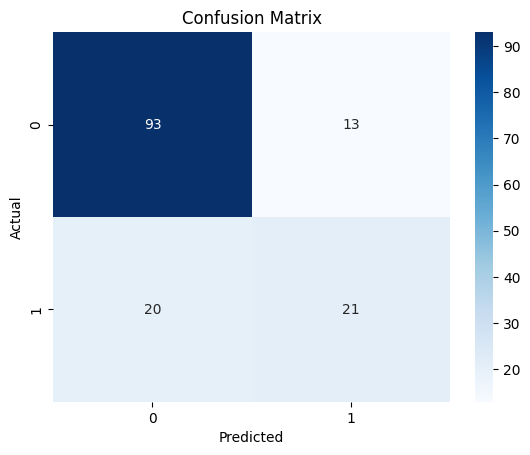

In [28]:
#model training
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

model = LogisticRegression(max_iter=1000)  # Default is 100
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()   


Accuracy: 0.7891156462585034

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       106
           1       0.64      0.56      0.60        41

    accuracy                           0.79       147
   macro avg       0.74      0.72      0.73       147
weighted avg       0.78      0.79      0.78       147



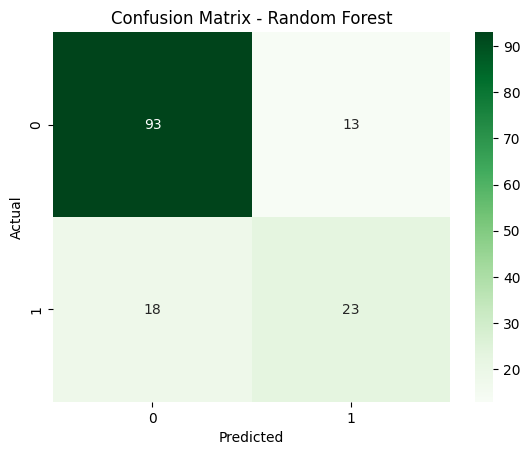

In [29]:
#Random forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define model
model = RandomForestClassifier(random_state=42)

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [30]:
import joblib
joblib.dump(model, "diabetes_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']